<a href="https://colab.research.google.com/github/coder-harshil/global-terrorism-analysis/blob/main/Capstone_Project_EDA_Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

##**Terrorism has been a global problem for decades now, and with recent misfortune in Afghanistan, it is high time that we shade light on how the attacks have happened over the years. Thanks to the assignment, we have data of more than 180,000 attacks that happened during 1970-2017.**

## **Here is a list of operations I will be performing in this colab notebook to analyse the dataset -**

## **1. Cleaning the data and keeping only required columns (there are 135 columns in the dataset, and I will select only the necessary ones).**

## **2. Replacing null values when and where necessary for smooth data analysis.**

## **3. Filtering dataset and creating other dataframes for diving deep into how particular factors influence the data.**

## **4. Creating basic visualizations to understand the convery the effect of factors.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing and reading the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/Global Terrorism Data.csv', encoding = 'latin1' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### **As the data contains many unnecessary columns, we will first filter and select only the essential ones for our analysis**

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
#Will use only the essential columns for the analysis of the data

columns_required = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill']
terror_df = pd.DataFrame(columns = columns_required, data = df)

In [7]:
terror_df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [8]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   attacktype1_txt  181691 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   gname            181691 non-null  object 
 10  weaptype1_txt    181691 non-null  object 
 11  nkill            171378 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 16.6+ MB


In [9]:
#Eliminating null values from 'nkill' column and replacing them by median values

terror_df.loc[terror_df['nkill'].isna(), 'nkill'] = terror_df.loc[~terror_df['nkill'].isna(), 'nkill'].median()

In [10]:
#Checking dataframe information again to ensure null values are filled

terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   attacktype1_txt  181691 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   gname            181691 non-null  object 
 10  weaptype1_txt    181691 non-null  object 
 11  nkill            181691 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 16.6+ MB


In [11]:
terror_df.describe()

,iyear,imonth,iday,nkill
count,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860
std,13.259430,3.388303,8.814045,11.227057
min,1970.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000


In [ ]:
#Saving CSV in system for creating better visuals with Tableau

terror_df.to_excel("/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/terror.xlsx")

#### **1. Now that we have got our data sorted, it is time to begin with regions that have faced most terror attacks. This will be achieved by grouping the data according to region. We will also analyse the top-20 countries according to number of attacks on them.**

In [12]:
#Making a new dataframe grouped by region

top_affected_region = terror_df['region_txt'].value_counts().reset_index()
top_affected_region.columns = ['region','attacks']
top_affected_region

,region,attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


<BarContainer object of 12 artists>

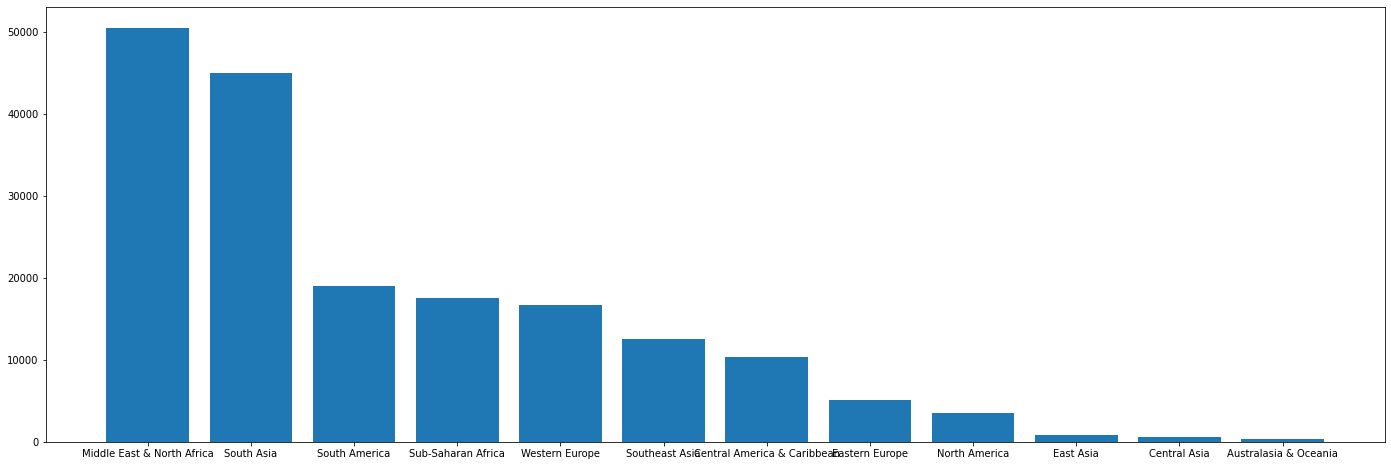

In [13]:
#Plotting regions vs number of attacks faced

fig = plt.figure(figsize =(24,8))
plt.bar(top_affected_region['region'], top_affected_region['attacks'])

In [14]:
#Making a new dataframe grouped by countries

country_wise_terrorism = terror_df['country_txt'].value_counts().reset_index()
top_20_countries = country_wise_terrorism.head(20)
top_20_countries.columns = ['country','number_of_attacks']

<BarContainer object of 20 artists>

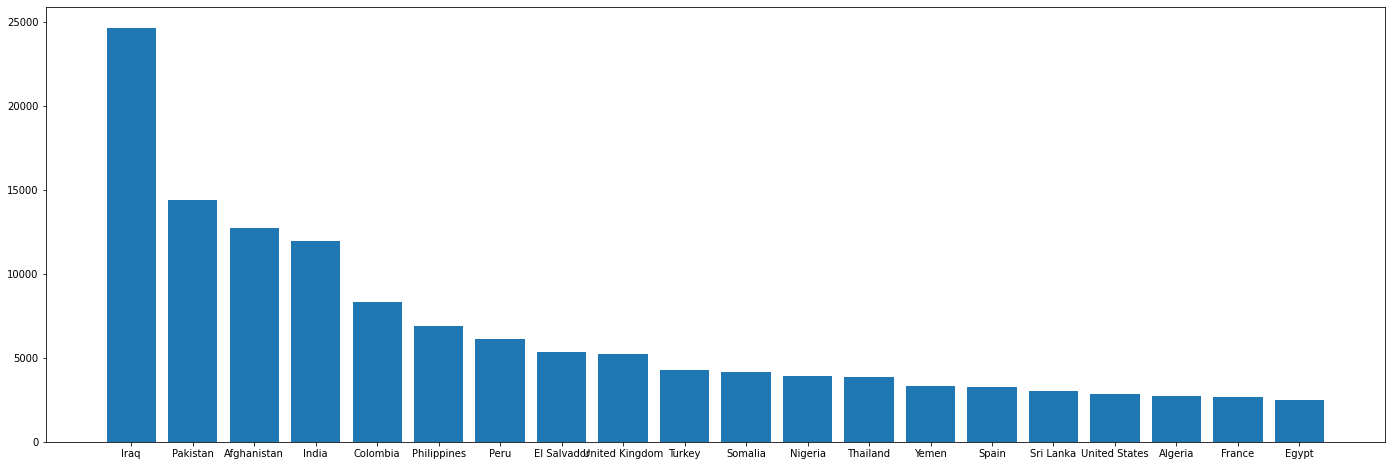

In [15]:
#Plotting countries vs number of attacks faced

fig = plt.figure(figsize =(24,8))
plt.bar(top_20_countries['country'], top_20_countries['number_of_attacks'])

As seen, most cases are from Middle East and Northern Africa primarily due to Iraq being a huge outlier in terms of the number of attacks faced. If we remove Iraq from the dataset, Middle East might not look actually bad.

However, same is not the case with South Asia where Pakistan, Afghanistan, and India have all faced massive number of terror attacks over the years.

**Concluding the first phase - While Middle East and North Africa look more dangerous due to Iraq, as a region overall - South Asia is in more danger of facing terror attacks.**

### **2. Now we are going to have a look at how the number of terror attacks have changed over the years and if there is a specific time of year that has faced drastically more terror attacks than other months**

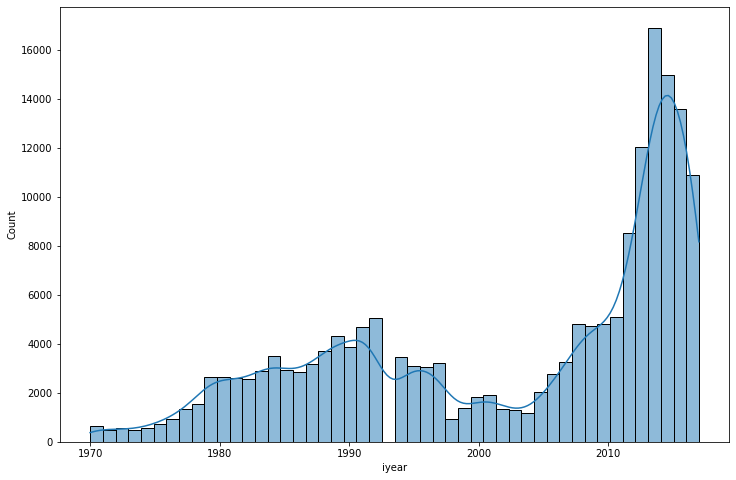

In [16]:
#Has terrorism seen a sharp rise or fall in the recent years?

fig = plt.figure(figsize =(12,8))
sns.histplot(terror_df, x = 'iyear', bins = 48, kde = True)

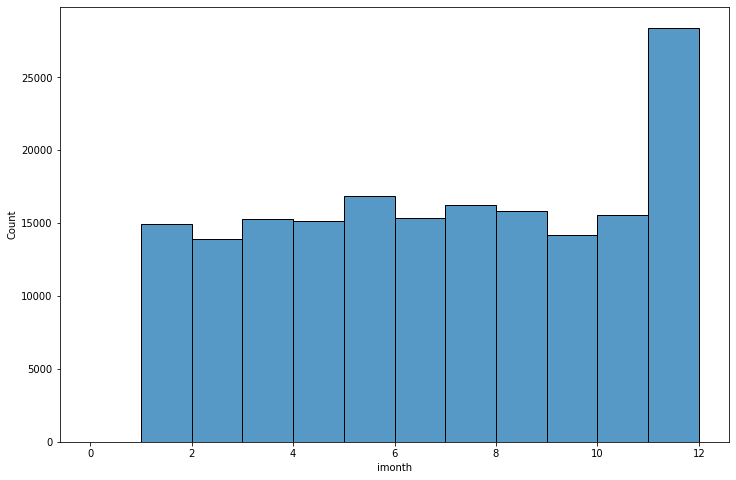

In [17]:
#What time of the year is prone to terror attacks the most

fig = plt.figure(figsize =(12,8))
sns.histplot(terror_df, x = 'imonth', bins = 12)

***Winter is coming***, is more than just a TV series phrase going by the analysis of this dataset. Most terror attacks happened in December, in Middle East and Asia, showing how terror groups are more active when the winter sets in? Do we have data of why this happens? No. 

**But what it does tell us is the time when a country's forces can be more alert in order to reduce the losses.**